# Low mass diphoton search: signal modelling
### Linear interpolation of the triple gaussian parameters 

This notebook shows the comparison between the results of the triple gaussian fits for each mass point in the scenario with the three mean values are frozen in the fit with and without taking into account the error bars.

The behaviour of a linear interpolation of the best estimate of each parameter for each mass point is shown.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 150

import scipy
from scipy.optimize import curve_fit
from scipy import misc
from scipy import stats
#from scipy.odr import *
#from pylab import * 

import statsmodels.api as sm
import statsmodels.formula.api as sm

import requests
import math
import re
import csv
import mplhep as hep

In [2]:
# PARAMETERS
mass = np.array([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70])

# Restricting fit range to the peak region (-3sigma, +3sigma)
# -----------------------------------------------------------
frac1 = np.array([0.616941, 0.786107, 0.839527, 0.662698, 0.511641, 0.525997, 0.296808, 0.507125, 0.714972, 0.764215, 0.141333, 0.394128, 0.681711, 0.629811]) 
frac2 = np.array([0.908863, 0.929146, 0.00793432, 0.218216, 0.409684, 0.0504783, 0.130418, 0.162328, 0.869985, 0.946381, 0.249453, 0.828113, 0.776842, 0.669321]) 
mean1 = np.array([4.9872, 10.0093, 14.968, 19.9323, 25.0551, 29.9503, 35.0216, 39.9755, 44.9384, 49.9409, 54.9957, 59.9928, 64.9466, 69.9075]) 
mean2 = np.array([5, 8.65064, 16.4387, 20.2743, 24.7024, 25.7202, 33.6065, 39.0571, 44.2623, 49.2855, 54.4261, 59.7935, 64.3948, 69.3615]) 
mean3 = np.array([5.96956, 11.8907, 14.6674, 19.7685, 24.7828, 29.8662, 34.8912, 39.8074, 46.2013, 51.7481, 54.8818, 58.5878, 64.3462, 69.9058]) 
sigma1 = np.array([0.1, 0.154047, 0.228499, 0.258232, 0.265931, 0.314271, 0.285999, 0.416409, 0.458451, 0.573158, 0.313046, 0.517024, 0.660719, 0.650068]) 
sigma2 = np.array([2.41388, 1.86957, 1.63275, 0.303687, 0.300393, 1.55073, 1.60056, 1.59334, 1.0042, 1.14352, 1.45882, 0.853111, 1.35748, 1.43451]) 
sigma3 = np.array([0.479238, 0.311122, 7.48206, 0.647163, 0.821263, 0.665501, 0.608116, 0.790149, 0.351417, 0.301649, 0.692229, 1.84803, 1.38103, 1.17401]) 
frac1_err = np.array([0.688341, 0.569376, 0.206053, 1.10364, 1.62412, 0.724072, 1.11734, 1.23293, 0.514726, 0.523548, 1.1092, 1.33282, 0.315828, 1.2972]) 
frac2_err = np.array([0.241961, 0.616911, 0.218681, 0.829728, 0.665893, 0.906219, 0.514639, 0.903359, 0.934441, 0.770588, 0.600926, 0.881743, 0.611437, 0.628113]) 
mean1_err = np.array([0.306493, 0.112817, 0.0908072, 0.434391, 0.902711, 0.157572, 0.277435, 0.215386, 0.147939, 0.177278, 0.412849, 0.427341, 0.194531, 0.284766]) 
mean2_err = np.array([0.00001, 2.36502, 2.2143, 5.99852, 2.56425, 7.97274, 9.78187, 11.3017, 2.4347, 1.99916, 1.33508, 1.06198, 4.08843, 6.71428]) 
mean3_err = np.array([1.11984, 2.0464, 2.50554, 0.852838, 0.552944, 0.621105, 0.291228, 0.929034, 0.978362, 0.853967, 0.347962, 6.39131, 18.741, 9.28738]) 
sigma1_err = np.array([0.55078, 0.134821, 0.0835539, 0.252427, 0.412495, 0.236319, 0.323419, 0.350385, 0.200814, 0.230197, 0.608327, 0.678947, 0.199427, 0.415275]) 
sigma2_err = np.array([0.936492, 1.9108, 1.13456, 1.50125, 2.36594, 1.94021, 1.57663, 1.65103, 0.841381, 0.677882, 1.91895, 1.6133, 1.73782, 1.5363]) 
sigma3_err = np.array([2.09388, 7.114, 7.17528, 0.685283, 0.97078, 0.638206, 0.476611, 1.15237, 6.87874, 8.72117, 0.574366, 5.43464, 8.69121, 8.66027])

# Simple fits with mean1, mean2, mean3 frozen (=mf)
mf_frac1 = np.array([0.625779, 0.784049, 0.809611, 0.80111, 0.731857, 0.686968, 0.637502, 0.660996, 0.677942, 0.289181, 0.16819, 0.545386, 0.56857, 0.611627]) 
mf_frac2 = np.array([0.399245, 0.405339, 0.637501, 0.693729, 0.640065, 0.631159, 0.601895, 0.583014, 0.660138, 0.250919, 0.18884, 0.406064, 0.36028, 0.161766]) 
mf_sigma1 = np.array([0.1, 0.152032, 0.222348, 0.285432, 0.317535, 0.349399, 0.395284, 0.457787, 0.572137, 0.89138, 0.322666, 0.579111, 0.622214, 0.633486]) 
mf_sigma2 = np.array([0.56062, 0.437248, 0.637811, 0.466651, 0.63581, 0.706258, 0.904774, 0.966719, 1.1639, 1.12281, 1.63637, 1.51087, 1.54133, 0.859448]) 
mf_sigma3 = np.array([0.484669, 0.78559, 0.849562, 0.551419, 0.650482, 0.690019, 0.69401, 0.912817, 0.237354, 0.490589, 0.736486, 0.832178, 1.05232, 1.4097]) 
mf_frac1_err = np.array([0.810679, 0.736269, 0.325258, 0.260366, 0.335833, 0.355879, 0.458704, 0.484452, 0.405408, 0.618869, 0.613935, 0.870662, 0.874768, 0.75485]) 
mf_frac2_err = np.array([0.527997, 0.590313, 0.670387, 0.761352, 0.742504, 0.739839, 0.777574, 0.788488, 0.828221, 0.34622, 0.219338, 0.537795, 0.503291, 0.751834]) 
mf_sigma1_err = np.array([0.84334, 0.45822, 0.108064, 0.119407, 0.143222, 0.14756, 0.198371, 0.21045, 0.236183, 0.773643, 0.531378, 0.322161, 0.311596, 0.703642]) 
mf_sigma2_err = np.array([2.11667, 2.11572, 2.60129, 0.534754, 0.661289, 0.593436, 0.625857, 0.565673, 0.58518, 0.725729, 1.05556, 0.896173, 1.36034, 2.01914]) 
mf_sigma3_err = np.array([3.69443, 3.68506, 5.54086, 1.3744, 1.07676, 0.824554, 0.586926, 1.14637, 0.41577, 0.3601, 0.332333, 0.602365, 0.890163, 1.26983]) 

v_m = []
v_q = []

No error bars [-0.00508997  0.80507146]
W/ error bars [-0.00713088  0.90382704]


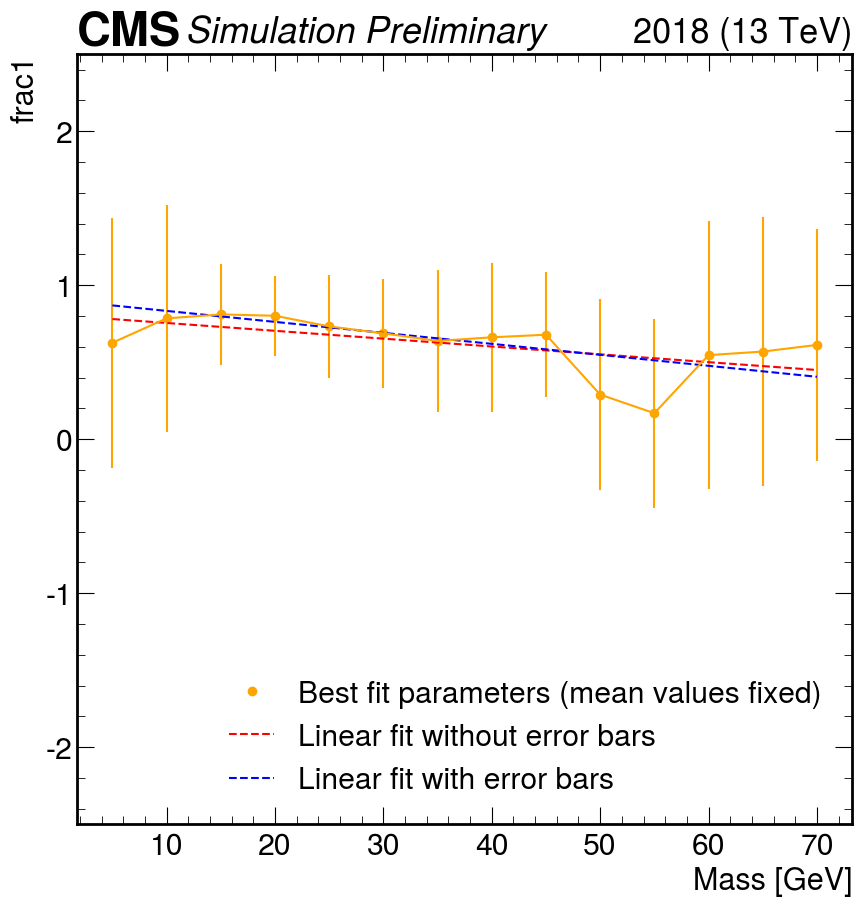

In [18]:
p = np.polyfit(mass, mf_frac1, 1)
print("No error bars", p)
x1 = np.linspace(5,70)
f1 = np.polyval(p,x1)

p_mf = np.polyfit(mass, mf_frac1, 1, w=1/mf_frac1_err)
print("W/ error bars", p_mf)
f1_mf = np.polyval(p_mf, x1)

plt.plot(mass, mf_frac1, 'o', color="orange", label='Best fit parameters (mean values fixed)')
plt.errorbar(mass, mf_frac1, yerr=mf_frac1_err, color="orange")
plt.plot(x1,f1,'r--', label='Linear fit without error bars') 
plt.plot(x1,f1_mf,'b--', label='Linear fit with error bars') 
plt.legend(loc='lower right')

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=False, year="2018")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

plt.xlabel('Mass [GeV]', fontsize=22)
plt.ylabel('frac1', fontsize=22)
plt.ylim(-2.5, 2.5)
plt.savefig('simpleFits/ErrorBars/frac1_fit.pdf', dpi=1200)
plt.savefig('simpleFits/ErrorBars/frac1_fit.png', dpi=1200)

No error bars [-0.00486932  0.65545341]
W/ error bars [-0.00583222  0.60324553]


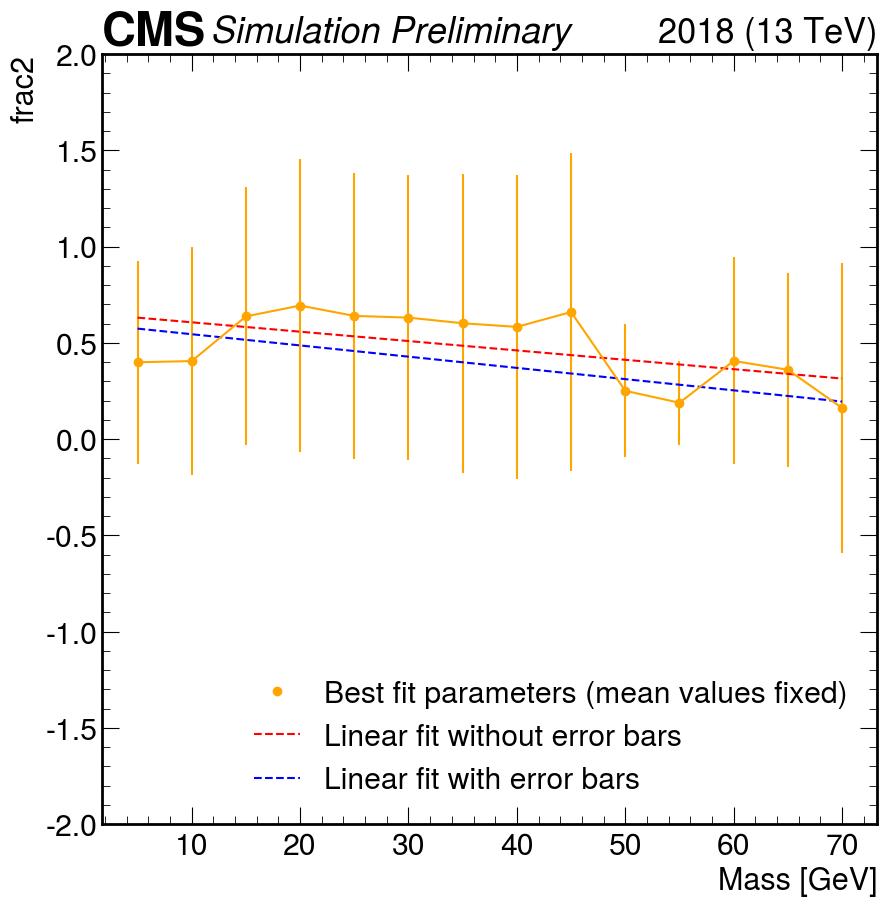

In [10]:
p = np.polyfit(mass, mf_frac2, 1)
print("No error bars", p)
x1 = np.linspace(5,70)
f1 = np.polyval(p,x1)

p_mf = np.polyfit(mass, mf_frac2, 1, w=1/mf_frac2_err)
print("W/ error bars", p_mf)
f1_mf = np.polyval(p_mf, x1)

plt.plot(mass, mf_frac2, 'o', color="orange", label='Best fit parameters (mean values fixed)')
plt.errorbar(mass, mf_frac2, yerr=mf_frac2_err, color="orange")
plt.plot(x1,f1,'r--', label='Linear fit without error bars') 
plt.plot(x1,f1_mf,'b--', label='Linear fit with error bars') 
plt.legend(loc='lower right')

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=False, year="2018")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

plt.xlabel('Mass [GeV]', fontsize=22)
plt.ylabel('frac2', fontsize=22)
plt.ylim(-2.0, 2.0)
plt.savefig('simpleFits/ErrorBars/frac2_fit.pdf', dpi=1200)
plt.savefig('simpleFits/ErrorBars/frac2_fit.png', dpi=1200)

No error bars [0.00843023 0.10535298]
W/ error bars [0.00844028 0.10557534]


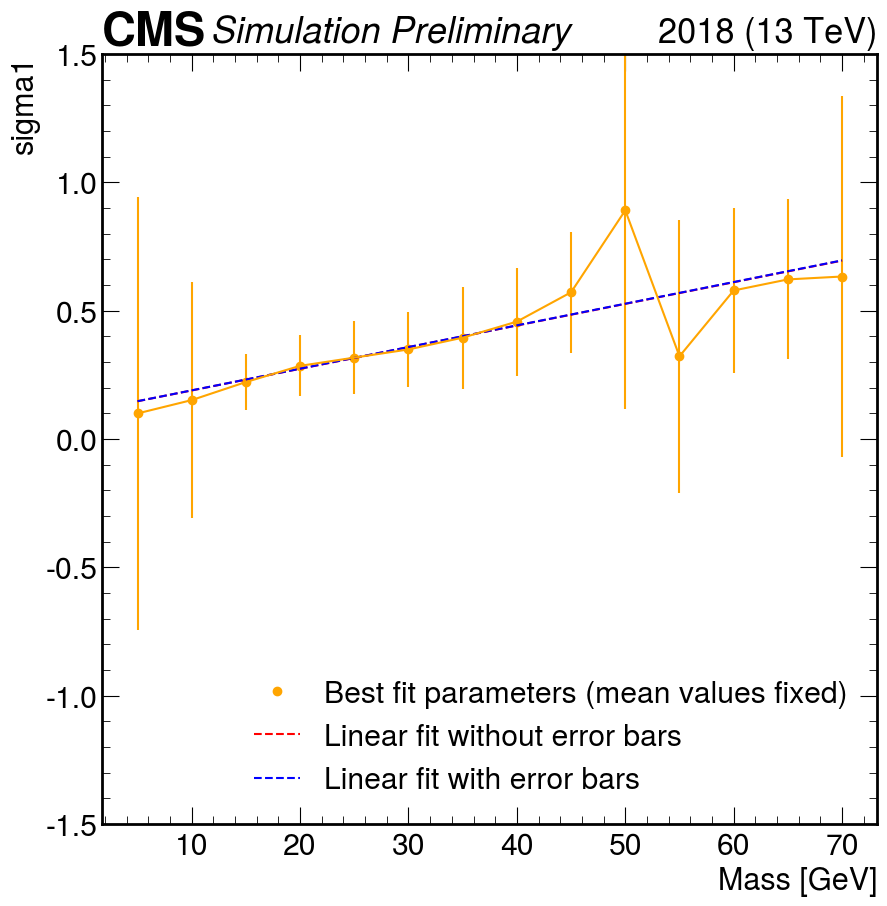

In [11]:
p = np.polyfit(mass, mf_sigma1, 1)
print("No error bars", p)
x1 = np.linspace(5,70)
f1 = np.polyval(p,x1)

p_mf = np.polyfit(mass, mf_sigma1, 1, w=1/mf_sigma1_err)
print("W/ error bars", p_mf)
f1_mf = np.polyval(p_mf, x1)

plt.plot(mass, mf_sigma1, 'o', color="orange", label='Best fit parameters (mean values fixed)')
plt.errorbar(mass, mf_sigma1, yerr=mf_sigma1_err, color="orange")
plt.plot(x1,f1,'r--', label='Linear fit without error bars') 
plt.plot(x1,f1_mf,'b--', label='Linear fit with error bars') 
plt.legend(loc='lower right')

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=False, year="2018")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

plt.xlabel('Mass [GeV]', fontsize=22)
plt.ylabel('sigma1', fontsize=22)
plt.ylim(-1.5, 1.5)
plt.legend(loc='lower right')
plt.savefig('simpleFits/ErrorBars/sigma1_fit.pdf', dpi=1000)
plt.savefig('simpleFits/ErrorBars/sigma1_fit.png', dpi=1000)

No error bars [0.01580004 0.34682826]
W/ error bars [0.02277089 0.07293725]


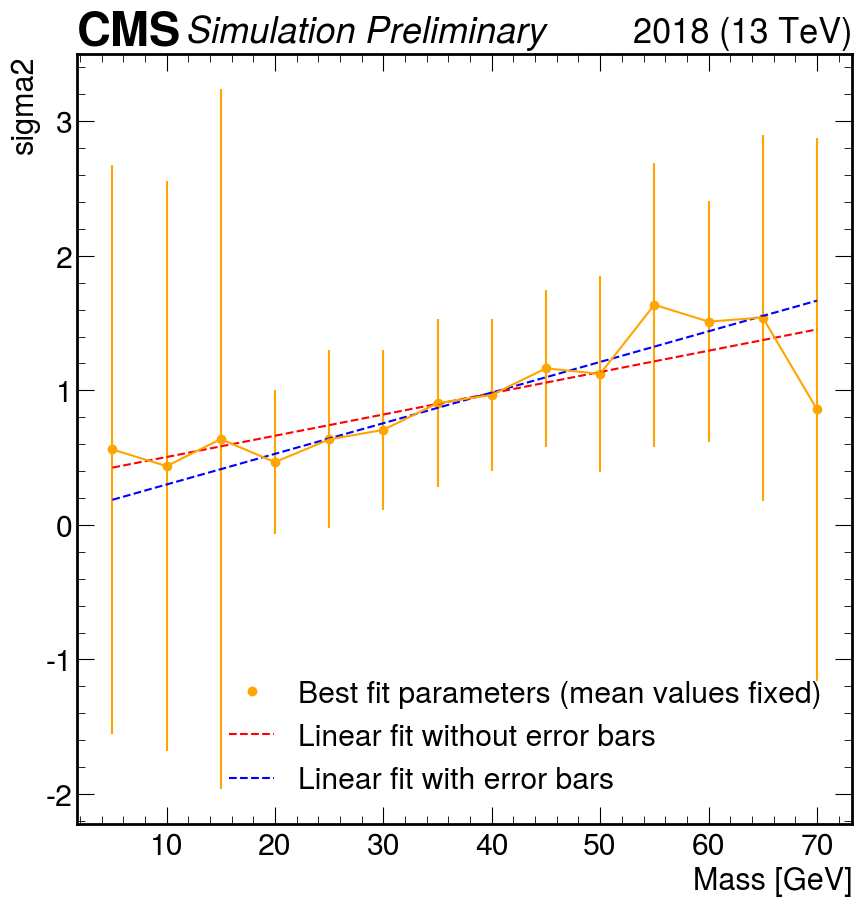

In [12]:
p = np.polyfit(mass, mf_sigma2, 1)
print("No error bars", p)
x1 = np.linspace(5,70)
f1 = np.polyval(p,x1)

p_mf = np.polyfit(mass, mf_sigma2, 1, w=1/mf_sigma2_err)
print("W/ error bars", p_mf)
f1_mf = np.polyval(p_mf, x1)

plt.plot(mass, mf_sigma2, 'o', color="orange", label='Best fit parameters (mean values fixed)')
plt.errorbar(mass, mf_sigma2, yerr=mf_sigma2_err, color="orange")
plt.plot(x1,f1,'r--', label='Linear fit without error bars') 
plt.plot(x1,f1_mf,'b--', label='Linear fit with error bars') 
plt.legend(loc='lower right')

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=False, year="2018")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

plt.xlabel('Mass [GeV]', fontsize=22)
plt.ylabel('sigma2', fontsize=22)
#plt.ylim(0.0, 1.5)
plt.legend(loc='lower right')
plt.savefig('simpleFits/ErrorBars/sigma2_fit.pdf', dpi=1000)
plt.savefig('simpleFits/ErrorBars/sigma2_fit.png', dpi=1000)

No error bars [0.00622408 0.50782503]
W/ error bars [0.00875934 0.19510179]


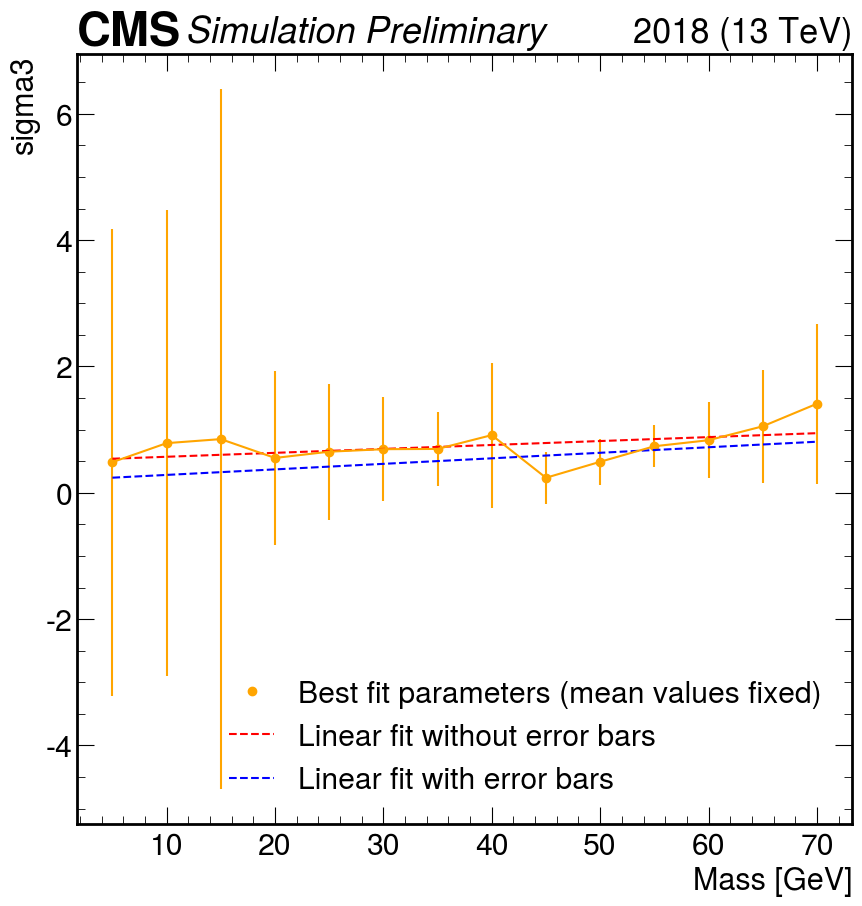

In [13]:
p = np.polyfit(mass, mf_sigma3, 1)
print("No error bars", p)
x1 = np.linspace(5,70)
f1 = np.polyval(p,x1)

p_mf = np.polyfit(mass, mf_sigma3, 1, w=1/mf_sigma3_err)
print("W/ error bars", p_mf)
f1_mf = np.polyval(p_mf, x1)

plt.plot(mass, mf_sigma3, 'o', color="orange", label='Best fit parameters (mean values fixed)')
plt.errorbar(mass, mf_sigma3, yerr=mf_sigma3_err, color="orange")
plt.plot(x1,f1,'r--', label='Linear fit without error bars') 
plt.plot(x1,f1_mf,'b--', label='Linear fit with error bars') 
plt.legend(loc='lower right')

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=False, year="2018")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

plt.xlabel('Mass [GeV]', fontsize=22)
plt.ylabel('sigma3', fontsize=22)
#plt.ylim(0.0, 2.5)
plt.legend(loc='lower right')
plt.savefig('simpleFits/ErrorBars/sigma3_fit.pdf', dpi=1000)
plt.savefig('simpleFits/ErrorBars/sigma3_fit.png', dpi=1000)

No error bars [0.99924765 0.00115604]
W/ error bars [ 0.99906219 -0.00404771]


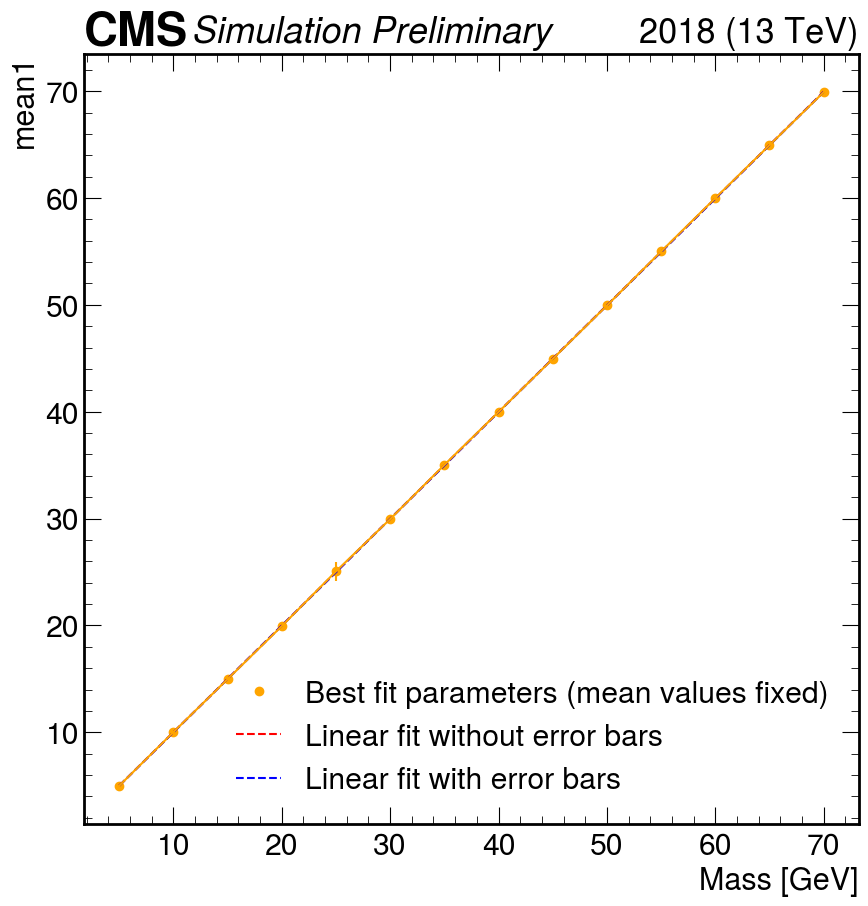

In [14]:
p = np.polyfit(mass, mean1, 1)
print("No error bars", p)
x1 = np.linspace(5,70)
f1 = np.polyval(p,x1)

p_mf = np.polyfit(mass, mean1, 1, w=1/mean1_err)
print("W/ error bars", p_mf)
f1_mf = np.polyval(p_mf, x1)

plt.plot(mass, mean1, 'o', color="orange", label='Best fit parameters (mean values fixed)')
plt.errorbar(mass, mean1, yerr=mean1_err, color="orange")
plt.plot(x1,f1,'r--', label='Linear fit without error bars') 
plt.plot(x1,f1_mf,'b--', label='Linear fit with error bars') 
plt.legend(loc='lower right')

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=False, year="2018")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

plt.xlabel('Mass [GeV]', fontsize=22)
plt.ylabel('mean1', fontsize=22)
#plt.ylim(0.0, 1.)
plt.legend(loc='lower right')
plt.savefig('simpleFits/ErrorBars/mean1_fit.pdf', dpi=1000)
plt.savefig('simpleFits/ErrorBars/mean1_fit.png', dpi=1000)

No error bars [ 0.99478394 -0.52057341]
W/ error bars [0.99173609 0.04131954]


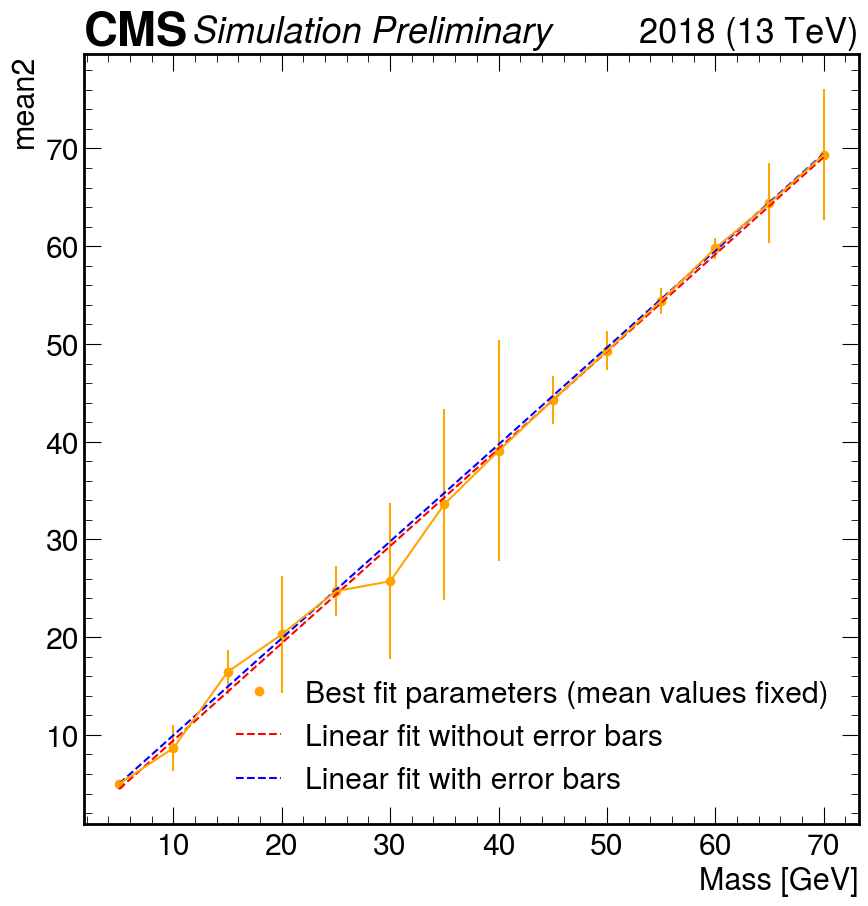

In [15]:
p = np.polyfit(mass, mean2, 1)
print("No error bars", p)
x1 = np.linspace(5,70)
f1 = np.polyval(p,x1)

p_mf = np.polyfit(mass, mean2, 1, w=1/mean2_err)
print("W/ error bars", p_mf)
f1_mf = np.polyval(p_mf, x1)

plt.plot(mass, mean2, 'o', color="orange", label='Best fit parameters (mean values fixed)')
plt.errorbar(mass, mean2, yerr=mean2_err, color="orange")
plt.plot(x1,f1,'r--', label='Linear fit without error bars') 
plt.plot(x1,f1_mf,'b--', label='Linear fit with error bars') 
plt.legend(loc='lower right')

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=False, year="2018")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

plt.xlabel('Mass [GeV]', fontsize=22)
plt.ylabel('mean2', fontsize=22)
#plt.ylim(0.0, 1.)
plt.legend(loc='lower right')
plt.savefig('simpleFits/ErrorBars/mean2_fit.pdf', dpi=1000)
plt.savefig('simpleFits/ErrorBars/mean2_fit.png', dpi=1000)

No error bars [0.98373904 0.77512593]
W/ error bars [ 1.0008075  -0.00194289]


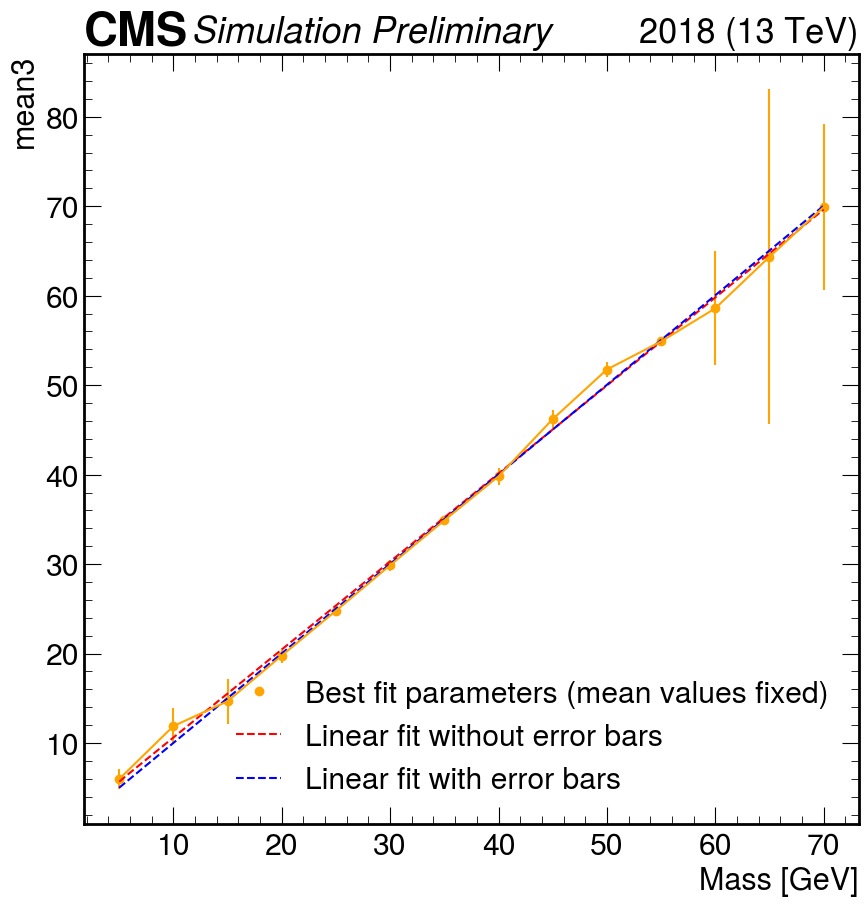

In [16]:
p = np.polyfit(mass, mean3, 1)
print("No error bars", p)
x1 = np.linspace(5,70)
f1 = np.polyval(p,x1)

p_mf = np.polyfit(mass, mean3, 1, w=1/mean3_err)
print("W/ error bars", p_mf)
f1_mf = np.polyval(p_mf, x1)

plt.plot(mass, mean3, 'o', color="orange", label='Best fit parameters (mean values fixed)')
plt.errorbar(mass, mean3, yerr=mean3_err, color="orange")
plt.plot(x1,f1,'r--', label='Linear fit without error bars') 
plt.plot(x1,f1_mf,'b--', label='Linear fit with error bars') 
plt.legend(loc='lower right')

plt.style.use(hep.style.ROOT)
# Overall - both left and right annotation
hep.cms.label("Preliminary", data=False, year="2018")
#hep.cms.label("", data=True, lumi=96.6, year="2017 + 2018")

plt.xlabel('Mass [GeV]', fontsize=22)
plt.ylabel('mean3', fontsize=22)
#plt.ylim(0.0, 1.)
plt.legend(loc='lower right')
plt.savefig('simpleFits/ErrorBars/mean3_fit.pdf', dpi=1000)
plt.savefig('simpleFits/ErrorBars/mean3_fit.png', dpi=1000)